

---



# **Analisis Sentimen Pengguna Aplikasi Sayurbox**

# Install libraries

In [1]:
!conda install -y gdown
!pip install google-play-scraper

/bin/bash: line 1: conda: command not found


In [2]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 2.7 MB/s eta 0:00:00


# Import Library

In [3]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Retrieve a user review of the sayurbox application from the Google Play web site.

Dalam mengambil ulasan aplikasi Sayurbox, saya menggunakan library reviews untuk mendapatkan semua informasi yang akan digunakan untuk analisis, seperti reviewID, username, content, score, date, dll.

In [4]:
# scraping review sayurbox
# sayurbox, continuation_token = reviews('com.sayurbox', # defaults to 0
#                                        lang='id', # defaults to 'id'
#                                        country='id', # defaults to 'id'
#                                        sort=Sort.NEWEST, # defaults to sort.MOST_RELEVANT
#                                        count=1905)

In [5]:
# data_sayurbox = pd.DataFrame(sayurbox)
# data_sayurbox

In [6]:
# data_sayurbox.to_excel('sayurbox.xlsx', index=False)
# data_sayurbox

# Connect & import the datasets from Google Drive

In [9]:
!gdown --id 1pb4L9tmt4xKxNe4wVKXdtj2Kh9ynx_Ef

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pb4L9tmt4xKxNe4wVKXdtj2Kh9ynx_Ef
To: /content/sayurbox.xlsx
100% 427k/427k [00:00<00:00, 83.7MB/s]


# Read the dataset

In [11]:
sayurbox = pd.read_excel('sayurbox.xlsx')
sayurbox.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat..packing aman..barang fresh.....,5,0,1.57.1,2022-03-31 23:22:32,NaN,NaT
1,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5,0,1.57.1,2022-03-31 23:18:27,NaN,NaT
2,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"pengiriman tepat waktu , pilihan tepat berbela...",5,0,1.57.2,2022-03-31 22:54:45,NaN,NaT
3,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,novri apriyanto,https://play-lh.googleusercontent.com/a-/AOh14...,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,5,0,1.57.1,2022-03-31 08:01:26,NaN,NaT
4,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,Meni Chandra,https://play-lh.googleusercontent.com/a-/AOh14...,sayur box makin mantap aja nih ..pertahanan ya,5,0,1.57.1,2022-03-31 07:18:30,NaN,NaT




---



# Data Exploration

## Displays the entire dataset column

In [12]:
sayurbox.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## Summary

In [13]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = sayurbox.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1905 non-null   object        
 1   userName              1905 non-null   object        
 2   userImage             1905 non-null   object        
 3   content               1905 non-null   object        
 4   score                 1905 non-null   int64         
 5   thumbsUpCount         1905 non-null   int64         
 6   reviewCreatedVersion  1543 non-null   object        
 7   at                    1905 non-null   datetime64[ns]
 8   replyContent          790 non-null    object        
 9   repliedAt             790 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 149.0+ KB
Ringkasan informasi: None


## Find Missing Values

In [14]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', sayurbox.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     362
at                         0
replyContent            1115
repliedAt               1115
dtype: int64


Ada 2 kolom yang mempunyai banyak missing values berjumlah 1000, yaitu replyContent dan repliedAt. Selain itu, terdapat kolom yang berisi missing values yang berjumlah 300 NaN, yaitu reviewCreatedVersion. Kolom replyContent dan repliedAt tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak Sayurbox terhadap ulasan pengguna dan tanggal balasannya. Sedangkan missing values yang terdapat di kolom reviewCreatedVersion tidak diisi karena berisi versi dari aplikasi Sayurbox.

## Remove Missing Values

In [15]:
# menghapus kolom replyContent, repliedAt, dan reviewCreatedVersion yang berisi missing values
sayurbox = sayurbox.drop(['replyContent','repliedAt','reviewCreatedVersion'], axis=1)
sayurbox.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at
0,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat..packing aman..barang fresh.....,5,0,2022-03-31 23:22:32
1,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5,0,2022-03-31 23:18:27
2,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"pengiriman tepat waktu , pilihan tepat berbela...",5,0,2022-03-31 22:54:45
3,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,novri apriyanto,https://play-lh.googleusercontent.com/a-/AOh14...,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,5,0,2022-03-31 08:01:26
4,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,Meni Chandra,https://play-lh.googleusercontent.com/a-/AOh14...,sayur box makin mantap aja nih ..pertahanan ya,5,0,2022-03-31 07:18:30


## Rename the columns

In [16]:
# mengganti nama kolom tanggal
sayurbox.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', sayurbox.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date'],
      dtype='object')


## Separate the date in the timestamp of the At column

In [17]:
# memisahkan tanggal yang terletak di timestamps
sayurbox['date'] = pd.to_datetime(sayurbox['date']).dt.date
sayurbox.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,date
0,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat..packing aman..barang fresh.....,5,0,2022-03-31
1,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5,0,2022-03-31
2,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"pengiriman tepat waktu , pilihan tepat berbela...",5,0,2022-03-31
3,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,novri apriyanto,https://play-lh.googleusercontent.com/a-/AOh14...,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,5,0,2022-03-31
4,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,Meni Chandra,https://play-lh.googleusercontent.com/a-/AOh14...,sayur box makin mantap aja nih ..pertahanan ya,5,0,2022-03-31


In [18]:
# memisahkan tahun dan bulan
sayurbox['year'] = pd.to_datetime(sayurbox['date']).dt.year
sayurbox['month'] = pd.to_datetime(sayurbox['date']).dt.month
# sayurbox['month'] = sayurbox['month'].apply(lambda x: calendar.month_abbr[x])

# Data Visualization

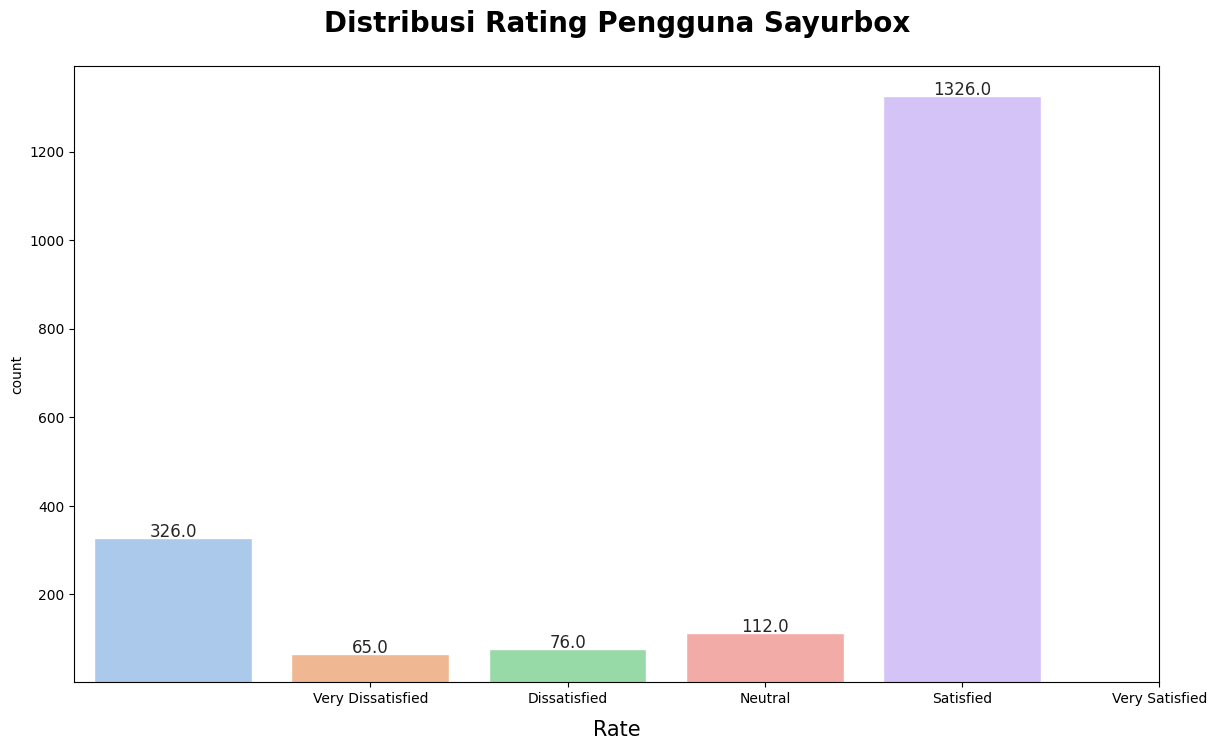

In [19]:
# visualisasi bar chart untuk melihat jumlah rating pengguna Sayurbox
fig, ax = plt.subplots(figsize=(14,8))
position = (1,2,3,4,5)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=sayurbox, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Sayurbox', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

In [20]:
grouped_data = sayurbox.groupby(['score', 'year']).size().reset_index(name='count')

In [21]:
label_mapping = {
    "Very Dissatisfied": 1,
    "Dissatisfied": 2,
    "Neutral": 3,
    "Satisfied": 4,
    "Very Satisfied": 5
}

grouped_data['score'] = grouped_data['score'].map(label_mapping)

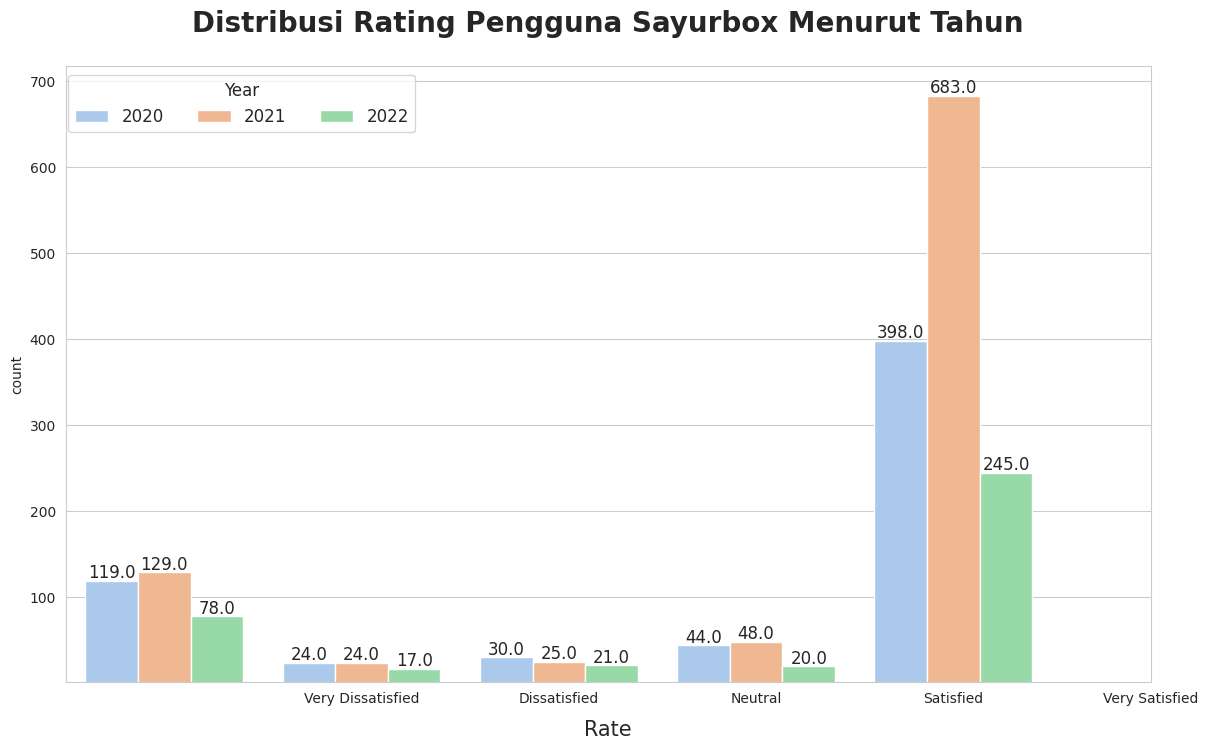

In [22]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (1,2,3,4,5)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=sayurbox, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna Sayurbox Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [23]:
sayurbox.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [24]:
print('Ringkasan dataset setelah dilakukan manipulasi data', sayurbox.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1905 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [25]:
sayurbox.head()

,content
0,pengiriman cepat..packing aman..barang fresh.....
1,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...
4,sayur box makin mantap aja nih ..pertahanan ya


## Delete Duplicate Data that contain in the content column

In [26]:
# menghitung jumlah ulasan yang duplikasi
sayurbox.duplicated().sum()

115

In [27]:
# menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
sayurbox.drop_duplicates(inplace=True)

In [28]:
# mengecek kembali jumlah duplikat setelah di hapus
sayurbox.duplicated().sum()

0

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.



---



# Data Preparation

## Case Folding

In [29]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

sayurbox['clean_review'] = sayurbox['content'].apply(lambda low:lowercase(str(low)))

In [30]:
sayurbox.head()

,content,clean_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat..packing aman..barang fresh.....
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela...","pengiriman tepat waktu , pilihan tepat berbela..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak² mager cem saiaah 😆 udh gitu s...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih ..pertahanan ya


# Cleaning Data

## Remove the emoji of the text.

In [31]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda emoji: remove_emoji(emoji))

## remove hashtag

In [32]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

## remove punctuation and number

In [33]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda num: remove_number(num))

In [34]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [35]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda num: remove_superscript(num))

## remove words repetition

In [36]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda word: word_repetition(word))

In [37]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda word: repetition(word))

## remove whitespaces

Meskipun telah dibersihkan, ulasan masih bisa mengandung spasi ganda yang dapat berasal dari pengguna ketika mengetik ataupun ketika melakukan pembersihan ulasan. Maka dari itu, menghapus spasi ganda diperlukan.

In [38]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## remove another words which doesn't give any information

Ulasan pengguna tidak hanya berisi kata yang bisa ditafsirkan atau dimengerti oleh manusia. Ada kalanya pengguna memberikan informasi berupa kode voucher, ketawa, atau kata abstrak yang tidak bisa/sulit diterjemahkan. Dimana kata tersebut bisa membingungkan orang yang menganalisisnya karena tidak tahu arti dari kata tersebut. Maka dari itu, saya melakukan pembersihan secara mendalam dengan menghapus seluruh kata abstrak yang nantinya tidak memberikan informasi apapun kepada model dan hanya menghambat kinerja model.

In [39]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [40]:
sayurbox.head()

,content,clean_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya


## change slang into standard terms (Normalization Phase)

Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI.

In [41]:
!gdown --id 1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y
To: /content/slang.txt
100% 32.8k/32.8k [00:00<00:00, 46.2MB/s]


In [42]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [43]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [44]:
clean_text = []
for review in sayurbox['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [45]:
clean_text

['pengiriman cepat pengepakan aman barang segar terima kasih sayuran box',
 'sesuai pesanan dan kurirnya ramah mohon dipertahankan',
 'pengiriman tepat waktu pilihan tepat berbelanja sayuran buah dan lain lain disini silahkan jangan ragu untuk belanja di sayurbox kerja bagus sukses terus tingkatkan kualitas dan kuantitas',
 'cocok buat ibu malas gerak macam saya sudah begitu sayurnya segar lebih murah dari supermarket sebelah semoga ke depan itemnya makin beragam ya',
 'sayuran box makin mantap saja nih pertahankan ya',
 'terima kasih ya promo nya banyak saran saja mungkin buat packaging nya bisa di kemas pakai mika plastik karena ada beberapa item yang hanya dibungkus plastik saja secara keseluruhan okay',
 'sering ya minimal promo nya supaya sering belanja nya di sayurbox tidak pindah ke lain hati mantap betul pokoknya',
 'mantap kualitas sayuran segar',
 'mantap mendukung',
 'sip',
 'sangat baik dan puas belanja di sayurbox',
 'terima kasih sayuran box cepat dan segar membantu ibu',

In [46]:
sayurbox['normalization'] = clean_text

In [47]:
sayurbox.head()

,content,clean_review,normalization
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya


## delete words containing 3 letters

Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [48]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [49]:
sayurbox['final_text'] = sayurbox['normalization'].apply(lambda remove: remove_small_words(str(remove)))

# Word Tokenizing

In [50]:
def word_token(review_text):
  return word_tokenize(review_text)

In [51]:
sayurbox['token'] = sayurbox['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [52]:
sayurbox.head()

,content,clean_review,normalization,final_text,token
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ..."
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe..."
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah..."
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]"


# Wordcloud Visualization

In [53]:
review_all = []

for review in sayurbox['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
tahu
mohon
diperbaiki
sayurannya
segar
promo
gratis
ongkos
kirim
untuk
minimal
pembelian
tidak
cuman
siap
sayuran
buah
bumbu
dapur
ikan
susu
lain
lain
lengkap
barusan
beli
apel
tapi
apelnya
sudah
busuk
yang
lainnya
bagus
terima
kasih
pesan
kedua
kali
benar
bikin
kesel
kelihatan
semua
kurangnya
aplikasi
chat
pelayanan
pelanggan
error
dikasih
nomor
whatsapp
jawab
otomatis
cuma
suruh
tekan
nomor
untuk
kurir
pastikan
memberikan
paket
tangan
pembeli
jangan
dititip
karena
barang
mudah
busuk
kalau
tidak
langsung
dilakukan
penyimpanan
yang
baik
habis
layu
busuk
pesanan
saya
fungsinya
nomor
handphone
diminta
untuk
menghubungi
pembeli
akan
jangan
asal
kasih
mana
diaplikasi
pesanan
tidak
bisa
dilacak
speechless
mantap
betul
lockdown
sangat
membantu
hanya
tinggal
tekan
handphone
semua
kebutuhan
datang
dengan
cepat
aman
kualitas
tidak
ragukan
terima
kasih
sayurbox
dengan
kurir
yang
sangat
ramah
berdedikasi
tinggi
semoga
sayurbox
terus
berjaya
menja

In [54]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire sayurbox's review")
freq_dist

how many frequency distribution samples from an entire sayurbox's review


FreqDist({'tidak': 856, 'yang': 701, 'sayuran': 656, 'belanja': 545, 'saya': 511, 'sayurbox': 446, 'aplikasi': 414, 'banget': 398, 'sangat': 391, 'segar': 353, ...})

In [55]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('tidak', 856), ('yang', 701), ('sayuran', 656), ('belanja', 545), ('saya', 511), ('sayurbox', 446), ('aplikasi', 414), ('banget', 398), ('sangat', 391), ('segar', 353), ('sudah', 352), ('bisa', 351), ('bagus', 327), ('kasih', 316), ('juga', 313), ('terima', 300), ('banyak', 248), ('barang', 247), ('buah', 246), ('pesan', 245), ('untuk', 240), ('lagi', 240), ('membantu', 231), ('promo', 219), ('pengiriman', 209), ('tapi', 207), ('dengan', 197), ('selalu', 190), ('jadi', 188), ('cepat', 170), ('kalau', 167), ('harga', 166), ('sampai', 161), ('saja', 158), ('karena', 154), ('lebih', 147), ('rumah', 142), ('pelayanan', 139), ('pandemik', 135), ('dari', 134), ('buat', 132), ('terus', 130), ('beli', 129), ('pesanan', 127), ('kualitas', 126), ('kirim', 126), ('mudah', 123), ('sekali', 123), ('mantap', 119), ('pelanggan', 117), ('semoga', 111), ('disini', 109), ('baik', 107), ('hari', 107), ('murah', 106), ('semua', 106), ('produk', 105), ('suka', 105), ('kupon', 104), ('belum', 102), ('wakt

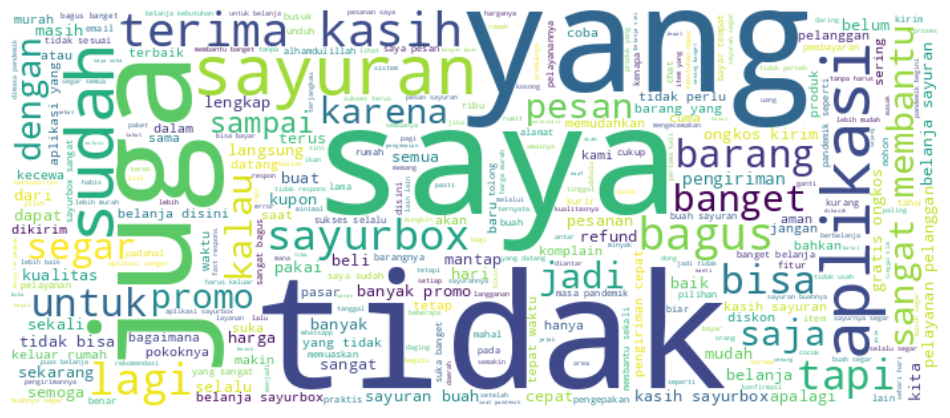

In [56]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [57]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,tidak,856
1,yang,701
2,sayuran,656
3,belanja,545
4,saya,511
...,...,...
475,masukkan,8
474,penting,8
473,kirimnya,8
472,plastik,8


In [58]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

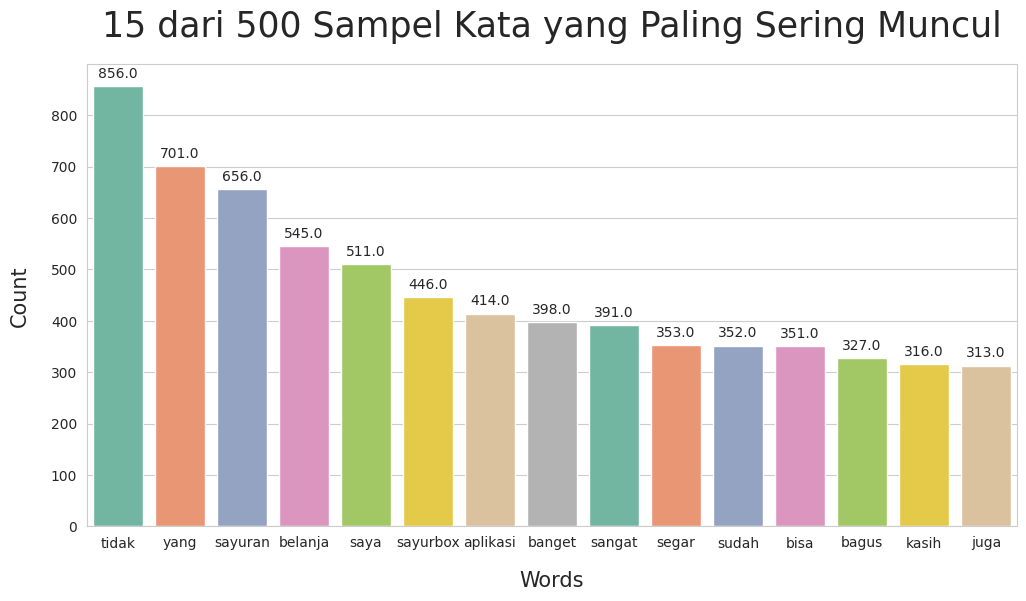

In [59]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Remove Stopword in bahasa

In [60]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [61]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [62]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [63]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

## function that used to remove stopwords

In [64]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

sayurbox['stop_review'] = sayurbox['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [65]:
sayurbox.head()

,content,clean_review,normalization,final_text,token,stop_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ..."
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe..."
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ..."
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]"


# Text Normalization
## Stemming Normalization

In [66]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [67]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

sayurbox['stem_review'] = sayurbox['stop_review'].apply(lambda stem:back_to_root(stem))

In [68]:
sayurbox.head()

,content,clean_review,normalization,final_text,token,stop_review,stem_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan


# Data Labeling

Ulasan masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Maka dari itu, saya melakukan proses pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

## Connect to Google Drive

In [69]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 71.8MB/s]


In [70]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 92.3MB/s]


## Read the positive and negative lexicon

In [71]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

## Create a function named sentiment_analysis_lexicon_indonesia which contains a for loop and if conditions to label each review

Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [72]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

### Conduct functional tests on dummy sentences.

In [73]:
string = "aplikasi ini sangat bagus bagus dan jujur"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-7, 'negatif')

### Separate the sentences in the stem_review column and then apply the sentiment_analysis_lexicon_indonesia function to that column

In [74]:
sayurbox['prepos_text'] = sayurbox.stem_review.str.split()

In [75]:
results = sayurbox['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
sayurbox['polarity_score'] = results[0]
sayurbox['polarity'] = results[1]
print(sayurbox['polarity'].value_counts())

positif    1029
negatif     588
netral      173
Name: polarity, dtype: int64


In [76]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
sayurbox = sayurbox.replace('',np.nan, regex=True)
sayurbox = sayurbox.dropna()

In [77]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
sayurbox = sayurbox.reset_index(drop=True)

In [78]:
print(sayurbox['polarity'].value_counts())

positif    1029
negatif     588
netral      132
Name: polarity, dtype: int64


In [79]:
sayurbox[(sayurbox['polarity']=='netral')]

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
47,dtg tepat waktu jd kt bisa atur kegiatan,dtg tepat waktu jd kt bisa atur kegiatan,datang tepat waktu jadi kata bisa atur kegiatan,datang tepat waktu jadi kata bisa atur kegiatan,"[datang, tepat, waktu, jadi, kata, bisa, atur,...","[atur, kegiatan]",atur giat,"[atur, giat]",0,netral
48,Goo job,goo job,bagus kerja,bagus kerja,"[bagus, kerja]","[bagus, kerja]",bagus kerja,"[bagus, kerja]",0,netral
56,Gak bisa di download,gak bisa di download,tidak bisa di unduh,tidak bisa unduh,"[tidak, bisa, unduh]",[unduh],unduh,[unduh],0,netral
65,Pengiriman tepat waktu dan pengemasan bagus 👍👍👍,pengiriman tepat waktu dan pengemasan bagus,pengiriman tepat waktu dan pengemasan bagus,pengiriman tepat waktu pengemasan bagus,"[pengiriman, tepat, waktu, pengemasan, bagus]","[pengiriman, pengemasan, bagus]",kirim emas bagus,"[kirim, emas, bagus]",0,netral
79,"sangat bagus dan membantu sekali,,,terimakasih...",sangat bagus dan membantu sekali terimakasih s...,sangat bagus dan membantu sekali terima kasih ...,sangat bagus membantu sekali terima kasih say...,"[sangat, bagus, membantu, sekali, terima, kasi...","[bagus, membantu, terima, kasih, sayurbox]",bagus bantu terima kasih sayurbox,"[bagus, bantu, terima, kasih, sayurbox]",0,netral
...,...,...,...,...,...,...,...,...,...,...
1669,Pelayanan yang buruk dari servicenya. Tidak ad...,pelayanan yang buruk dari servicenya tidak ada...,pelayanan yang buruk dari service nya tidak ad...,pelayanan yang buruk dari service tidak bala...,"[pelayanan, yang, buruk, dari, service, tidak,...","[pelayanan, buruk, service, balasan, chat, bay...",layan buruk service balas chat bayar pakai gop...,"[layan, buruk, service, balas, chat, bayar, pa...",0,netral
1684,aplikasi yg memudahkan belanja sayuran dan bua...,aplikasi yg memudahkan belanja sayuran dan bua...,aplikasi yang memudahkan belanja sayuran dan b...,aplikasi yang memudahkan belanja sayuran buah...,"[aplikasi, yang, memudahkan, belanja, sayuran,...","[aplikasi, memudahkan, belanja, sayuran, buah,...",aplikasi mudah belanja sayur buah sayur buah s...,"[aplikasi, mudah, belanja, sayur, buah, sayur,...",0,netral
1694,Recomended,recomended,rekomendasi,rekomendasi,[rekomendasi],[rekomendasi],rekomendasi,[rekomendasi],0,netral
1696,"sehat2 ya kalian, terimakasih sudah mensuplai ...",sehat ya kalian terimakasih sudah mensuplai ke...,sehat ya kalian terima kasih sudah menyuplai k...,sehat kalian terima kasih sudah menyuplai keb...,"[sehat, kalian, terima, kasih, sudah, menyupla...","[sehat, terima, kasih, menyuplai, kebutuhan, h...",sehat terima kasih suplai butuh hari,"[sehat, terima, kasih, suplai, butuh, hari]",0,netral


### Delete review with neutral sentiment

In [80]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
sayurbox = sayurbox.drop(sayurbox[sayurbox['polarity'] == 'netral'].index)
sayurbox = sayurbox.reset_index(drop=True)

In [81]:
sayurbox.head(20)

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...,"[kirim, cepat, epak, aman, barang, segar, teri...",9,positif
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan,"[sesuai, pesan, kurir, ramah, mohon, tahan]",3,positif
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...,"[kirim, pilih, belanja, sayur, buah, silah, ra...",5,positif
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...,"[cocok, malas, gerak, sayur, segar, murah, sup...",-1,negatif
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan,"[sayur, mantap, tahan]",4,positif
5,"Thanks ya, promonya banyak. Saran aja mungkin ...",thanks ya promonya banyak saran aja mungkin bu...,terima kasih ya promo nya banyak saran saja mu...,terima kasih promo banyak saran saja mungkin...,"[terima, kasih, promo, banyak, saran, saja, mu...","[terima, kasih, promo, saran, packaging, kemas...",terima kasih promo saran packaging kemas pakai...,"[terima, kasih, promo, saran, packaging, kemas...",6,positif
6,"sering-sering yah min promo nya, spy sering be...",sering yah min promo nya spy sering belanja ny...,sering ya minimal promo nya supaya sering bela...,sering minimal promo supaya sering belanja ...,"[sering, minimal, promo, supaya, sering, belan...","[minimal, promo, belanja, sayurbox, pindah, ha...",minimal promo belanja sayurbox pindah hati man...,"[minimal, promo, belanja, sayurbox, pindah, ha...",2,positif
7,mantap kwalitas sayuran segar²,mantap kwalitas sayuran segar,mantap kualitas sayuran segar,mantap kualitas sayuran segar,"[mantap, kualitas, sayuran, segar]","[mantap, kualitas, sayuran, segar]",mantap kualitas sayur segar,"[mantap, kualitas, sayur, segar]",13,positif
8,Mantap mendukung,mantap mendukung,mantap mendukung,mantap mendukung,"[mantap, mendukung]","[mantap, mendukung]",mantap dukung,"[mantap, dukung]",9,positif
9,Sangat Baik Dan Puas Belanja Di SayurBox,sangat baik dan puas belanja di sayurbox,sangat baik dan puas belanja di sayurbox,sangat baik puas belanja sayurbox,"[sangat, baik, puas, belanja, sayurbox]","[puas, belanja, sayurbox]",puas belanja sayurbox,"[puas, belanja, sayurbox]",2,positif


### Sentiment visualization

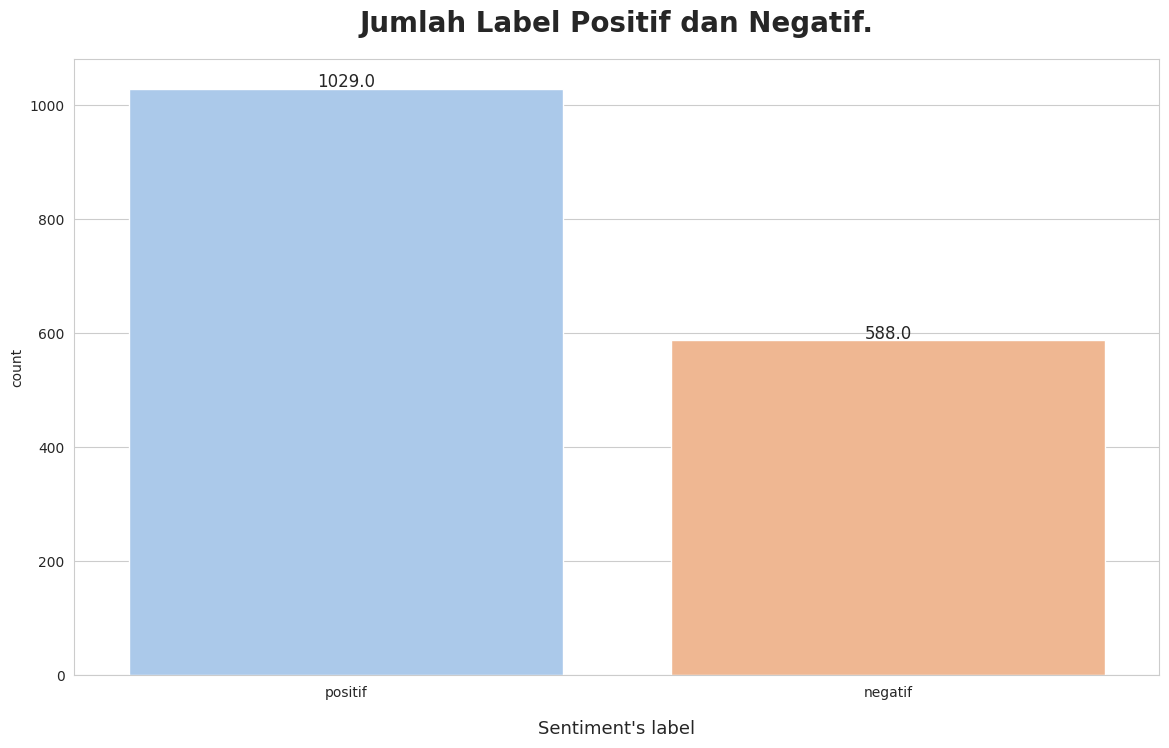

In [82]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=sayurbox, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [83]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in sayurbox['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
sayurbox['polarity'] = polarity

In [84]:
sayurbox['polarity']

0       1
1       1
2       1
3      -1
4       1
       ..
1612    1
1613   -1
1614    1
1615    1
1616    1
Name: polarity, Length: 1617, dtype: int64

In [85]:
sayurbox.polarity.value_counts()

 1    1029
-1     588
Name: polarity, dtype: int64

In [86]:
print("percentage of sentiment:")
train_pct_pos = sayurbox.polarity.value_counts()[1]/sayurbox.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = sayurbox.polarity.value_counts()[-1]/sayurbox.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 63.64 %
percentage of negative sentiment: 36.36 %
difference between percentage positive and negative: 27.27 %


### Sentiment WordCloud

#### Wordcloud for positive sentiment

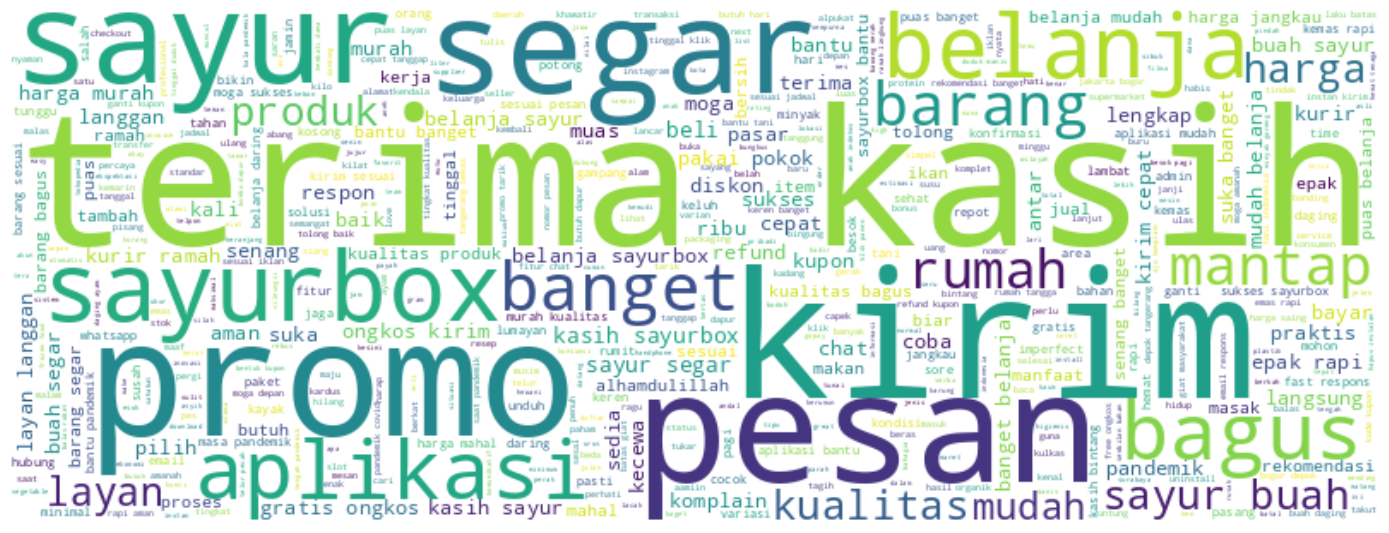

In [87]:
sentiment_pos = ' '.join([review for review in sayurbox['stem_review'][sayurbox['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

#### Wordcloud for negative sentiment

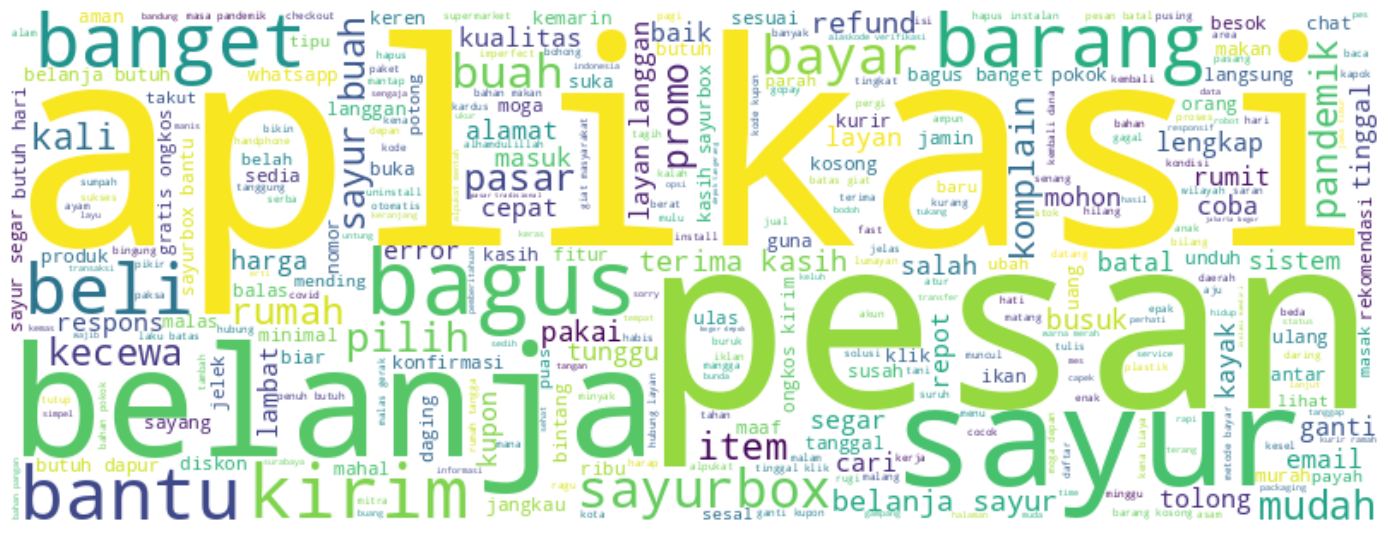

In [88]:
sentiment_neg = ' '.join([review for review in sayurbox['stem_review'][sayurbox['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [89]:
sayurbox = sayurbox.replace('',np.nan, regex=True)

In [90]:
sayurbox = sayurbox.dropna()

In [91]:
sayurbox = sayurbox.reset_index(drop=True)

In [92]:
sayurbox.to_excel("sayurbox_fix_dataset.xlsx", index=False)



---



# Split the review into data train and test

In [93]:
X = sayurbox['stem_review']
y = sayurbox['polarity']

In [94]:
sayurbox.head()

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...,"[kirim, cepat, epak, aman, barang, segar, teri...",9,1
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan,"[sesuai, pesan, kurir, ramah, mohon, tahan]",3,1
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...,"[kirim, pilih, belanja, sayur, buah, silah, ra...",5,1
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...,"[cocok, malas, gerak, sayur, segar, murah, sup...",-1,-1
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan,"[sayur, mantap, tahan]",4,1


In [95]:
from sklearn.model_selection import train_test_split

### Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [96]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    SVM = SVC(kernel='linear')
    SVM.fit(X_train_vect, y_train)
    print(SVM.score(X_train_vect, y_train))
    predict = SVM.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, predict))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, predict)
    print("Recall Score:", recall)
    precision = precision_score(y_test, predict)
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
0.9814432989690721
confusion matrix:
 [[56 14]
 [ 4 88]]
              precision    recall  f1-score   support

          -1       0.93      0.80      0.86        70
           1       0.86      0.96      0.91        92

    accuracy                           0.89       162
   macro avg       0.90      0.88      0.88       162
weighted avg       0.89      0.89      0.89       162

Accuracy Score: 0.89
Recall Score: 0.9565217391304348
Precision Score: 0.8627450980392157


test size: 0.1
random state: 5
0.9807560137457044
confusion matrix:
 [[ 44   8]
 [  8 102]]
              precision    recall  f1-score   support

          -1       0.85      0.85      0.85        52
           1       0.93      0.93      0.93       110

    accuracy                           0.90       162
   macro avg       0.89      0.89      0.89       162
weighted avg       0.90      0.90      0.90       162

Accuracy Score: 0.9
Recall Score: 0.9272727272727272
Precision Score: 0.92

In [97]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[56, 14], [4, 88]]",0.888889,0.956522,0.862745
1,0.1,5,"[[44, 8], [8, 102]]",0.901235,0.927273,0.927273
2,0.1,10,"[[53, 8], [5, 96]]",0.919753,0.950495,0.923077
3,0.1,15,"[[36, 7], [6, 113]]",0.919753,0.949580,0.941667
4,0.1,20,"[[44, 5], [4, 109]]",0.944444,0.964602,0.956140
5,0.1,25,"[[47, 8], [7, 100]]",0.907407,0.934579,0.925926
6,0.2,0,"[[97, 25], [16, 186]]",0.873457,0.920792,0.881517
7,0.2,5,"[[98, 20], [18, 188]]",0.882716,0.912621,0.903846
8,0.2,10,"[[92, 18], [12, 202]]",0.907407,0.943925,0.918182
9,0.2,15,"[[82, 16], [10, 216]]",0.919753,0.955752,0.931034


In [98]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[56, 14], [4, 88]]",0.89,0.96,0.86
1,0.1,5,"[[44, 8], [8, 102]]",0.90,0.93,0.93
2,0.1,10,"[[53, 8], [5, 96]]",0.92,0.95,0.92
3,0.1,15,"[[36, 7], [6, 113]]",0.92,0.95,0.94
4,0.1,20,"[[44, 5], [4, 109]]",0.94,0.96,0.96
5,0.1,25,"[[47, 8], [7, 100]]",0.91,0.93,0.93
6,0.2,0,"[[97, 25], [16, 186]]",0.87,0.92,0.88
7,0.2,5,"[[98, 20], [18, 188]]",0.88,0.91,0.90
8,0.2,10,"[[92, 18], [12, 202]]",0.91,0.94,0.92
9,0.2,15,"[[82, 16], [10, 216]]",0.92,0.96,0.93


### Visualisasi grafik untuk melihat kenaikan akurasi terbaik berdasarkan test_size

In [99]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan recall terbaik berdasarkan test_size

In [100]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan precision terbaik berdasarkan test_size

In [101]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Berdasarkan hasil penelitian di atas terkait parameter test_size dan random_state terbaik, diperoleh bahwa ukuran test_size = 0,1 dan random_state = 20 memperoleh nilai akurasi, recall, dan precision lebih tinggi dibandingkan ukuran yang lain. Sehingga ukuran tersebut akan digunakan untuk melakukan splitting dataset.

## Data Splitting into data train and data test

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=20)

In [103]:
X_train.shape

(1455,)

In [104]:
X_test.shape

(162,)

In [105]:
X_train

597     mantap murah gratis ongkos kirim kemas mantap ...
1031            aplikasi bantu beli buah suka banget sale
526                                 promo produk kualitas
482     bantu masyarakat mudah belanja sayur butuh rum...
729                                                 mudah
                              ...                        
924               senang belanja repot belanja luar promo
1247    sorry buruk layan aplikasi bagus bantu kualita...
271                   sayur keren kirim cepat harga murah
474     aplikasi bagus manfaat promo diskon suka bange...
1379    hati belanja barang uang hilang komplain call ...
Name: stem_review, Length: 1455, dtype: object

In [106]:
print(X_train)

597     mantap murah gratis ongkos kirim kemas mantap ...
1031            aplikasi bantu beli buah suka banget sale
526                                 promo produk kualitas
482     bantu masyarakat mudah belanja sayur butuh rum...
729                                                 mudah
                              ...                        
924               senang belanja repot belanja luar promo
1247    sorry buruk layan aplikasi bagus bantu kualita...
271                   sayur keren kirim cepat harga murah
474     aplikasi bagus manfaat promo diskon suka bange...
1379    hati belanja barang uang hilang komplain call ...
Name: stem_review, Length: 1455, dtype: object


# Vector Representation

## TF IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [109]:
y_train.shape

(1455,)

In [110]:
X_train_vect

<1455x1457 sparse matrix of type '<class 'numpy.float64'>'
	with 13770 stored elements in Compressed Sparse Row format>

In [111]:
print(X_train_vect)

  (0, 528)	0.39229233853717627
  (0, 688)	0.24698212514883386
  (0, 617)	0.3955630080438264
  (0, 652)	0.18994187064011497
  (0, 925)	0.3037099165490921
  (0, 406)	0.313396036784397
  (0, 879)	0.29332185190812143
  (0, 793)	0.562195735787652
  (1, 1135)	0.7390554543924537
  (1, 101)	0.24152383314495735
  (1, 1268)	0.34057073627284024
  (1, 186)	0.2538256997818287
  (1, 132)	0.3096731483883863
  (1, 106)	0.2627968076330016
  (1, 63)	0.22380290468557107
  (2, 1034)	0.6292093471054674
  (2, 1040)	0.5523004420630251
  (2, 688)	0.5468636203040924
  (3, 807)	0.362038741028417
  (3, 1303)	0.411981602989888
  (3, 1117)	0.2512443214402517
  (3, 203)	0.5676217957716468
  (3, 1158)	0.15596906033275237
  (3, 130)	0.161749549738413
  (3, 872)	0.23021903751778386
  :	:
  (1454, 999)	0.22008726506535112
  (1454, 1180)	0.22008726506535112
  (1454, 69)	0.22008726506535112
  (1454, 330)	0.22008726506535112
  (1454, 1347)	0.2016691477311433
  (1454, 224)	0.18325103039693547
  (1454, 208)	0.17732172097212

In [112]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)



---



# Data Modeling

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [114]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [115]:
predict = svm.predict(X_test_vect)

In [116]:
predict

array([ 1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1])

In [117]:
predict_df = pd.DataFrame(predict, columns=['predict'])
# predict_df['y_actual'] = y_test.ravel()

In [118]:
predict_df

,predict
0,1
1,1
2,1
3,1
4,1
...,...
157,1
158,-1
159,-1
160,1


In [119]:
print(svm.coef_) # values of weight

  (0, 905)	0.4374517468693236
  (0, 230)	0.23870175396110374
  (0, 998)	0.08941586324008693
  (0, 495)	0.08941586324008693
  (0, 366)	0.08941586324008693
  (0, 156)	0.08941586324008693
  (0, 816)	0.08030520628079121
  (0, 412)	0.08030520628079121
  (0, 646)	0.09337313011406488
  (0, 451)	0.08555915111899468
  (0, 1414)	0.16668693330489492
  (0, 967)	0.16668693330489492
  (0, 768)	0.15273765052936844
  (0, 1408)	0.3667836845058005
  (0, 679)	0.3667836845058005
  (0, 209)	0.17988817984175562
  (0, 205)	0.16483414387843562
  (0, 1187)	0.1389150830672381
  (0, 1065)	0.1389150830672381
  (0, 950)	0.25457980406864833
  (0, 1338)	0.2519519233821777
  (0, 177)	0.2519519233821777
  (0, 492)	0.3122285300405401
  (0, 1077)	0.015186081055841811
  (0, 821)	0.14238089273269824
  :	:
  (0, 530)	0.12573831176199413
  (0, 1132)	-0.9693935431902995
  (0, 1381)	-0.2202087634348471
  (0, 1159)	0.14361553674967587
  (0, 1103)	0.6313901113296665
  (0, 1034)	1.5085363462467696
  (0, 1005)	-0.5707455415269153

In [120]:
print(svm.intercept_) # values of b

[-0.03075768]


In [121]:
print(svm.classes_) # class of sentiment

[-1  1]


In [122]:
print(svm.dual_coef_)

  (0, 0)	-0.410681657192517
  (0, 1)	-1.0
  (0, 2)	-0.5207010483229887
  (0, 3)	-0.5250134715517161
  (0, 4)	-0.3776323562432474
  (0, 5)	-0.07364300447602687
  (0, 6)	-1.0
  (0, 7)	-1.0
  (0, 8)	-1.0
  (0, 9)	-0.7050447790357811
  (0, 10)	-1.0
  (0, 11)	-1.0
  (0, 12)	-0.658686494207314
  (0, 13)	-0.40991371235356927
  (0, 14)	-1.0
  (0, 15)	-0.6281711936146044
  (0, 16)	-0.8589115341485788
  (0, 17)	-0.20147358318474756
  (0, 18)	-0.737663439028339
  (0, 19)	-1.0
  (0, 20)	-0.7880961464661982
  (0, 21)	-0.8299114758349996
  (0, 22)	-1.0
  (0, 23)	-0.7258337017566514
  (0, 24)	-1.0
  :	:
  (0, 705)	1.0
  (0, 706)	1.0
  (0, 707)	0.6442367442312879
  (0, 708)	0.3459299694357195
  (0, 709)	1.0
  (0, 710)	0.228187800428736
  (0, 711)	0.27003781645323016
  (0, 712)	1.0
  (0, 713)	1.0
  (0, 714)	0.5663002179531442
  (0, 715)	1.0
  (0, 716)	1.0
  (0, 717)	1.0
  (0, 718)	1.0
  (0, 719)	1.0
  (0, 720)	0.6782731792372972
  (0, 721)	0.36309082595852066
  (0, 722)	1.0
  (0, 723)	0.582880327628307

In [123]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9828178694158075

In [124]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.9444444444444444

In [125]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.2222222222222222




---



## Final Visualization that represented the result of Predicted

In [126]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

114
48


In [127]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,48
1,1,114


In [128]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 70.37 %
percentage of negative sentiment: 29.63 %
difference between percentage positive and negative: 40.74 %


### Pie Chart

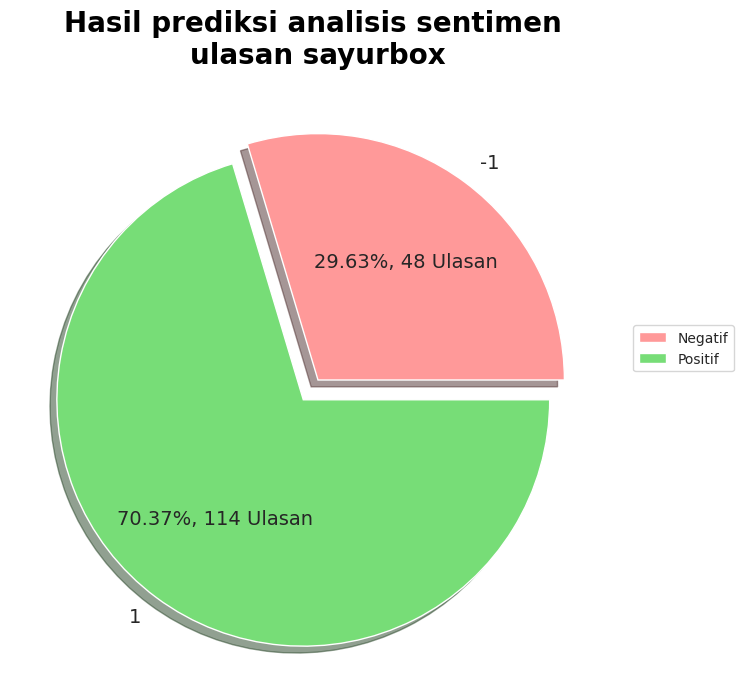

In [129]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan sayurbox', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

# plt.savefig('Hasilprediksi_sayurbox.png')
plt.show()

Model berhasil memprediksi data uji ulasan sebagai sentimen positif sebesar 70,37% atau sebanyak 114 ulasan dan sentimen negatif sebesar 29,63% atau sebanyak 48 ulasan. Dapat dilihat bahwa model lebih banyak memprediksi ulasan baru sebagai sentimen positif dibandingkan dengan negatif. Penyebabnya adalah di masa lampau model lebih banyak belajar dan
mengenali pola data ulasan yang positif dibandingkan negatif, sehingga model menjadi kurang mempelajari pola data ulasan yang negatif.



---



# Evaluation

In [130]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[ 44,   5],
       [  4, 109]])

### Confusion matrix visualization

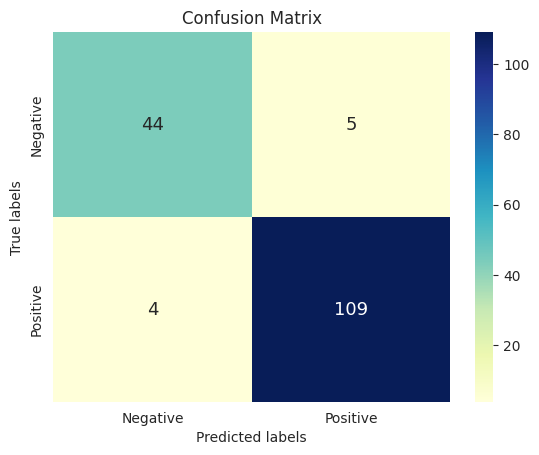

In [131]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [132]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.92      0.90      0.91        49
    Positive       0.96      0.96      0.96       113

    accuracy                           0.94       162
   macro avg       0.94      0.93      0.93       162
weighted avg       0.94      0.94      0.94       162



In [133]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))
recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.94
Recall model: 0.96
Precision model: 0.96


Berdasarkan penelitian yang telah dilakukan menggunakan metode Lexicon-Based dan algoritma Support Vector Machine, didapatkan nilai accuracy sebesar 94%, recall sebesar 96%, precision sebesar 96%, dan kesalahan prediksi sebanyak 9 data. Selain itu, diperoleh juga hasil prediksi data uji ulasan Sayurbox sebagai sentimen positif sebanyak 114 ulasan dan sentimen negatif sebanyak 48 ulasan. Diketahui bahwa algoritma Support Vector Machine cenderung memprediksi data uji sebagai sentimen positif dibandingkan sentimen negatif. Oleh karena itu, dapat ditarik sebuah asumsi bahwa pengguna senang, serta suka terhadap pelayanan, pengiriman, kualitas, dan harga produk yang diberikan oleh Sayurbox.

In [134]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1


In [135]:
import time
import joblib

In [136]:
joblib.dump(svm,"/content/sample_data/modelSVM.sav")

['/content/sample_data/modelSVM.sav']

In [137]:
%%writefile "/content/sample_data/stream-app.py"
import streamlit as st
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load saved model
model = joblib.load('/content/sample_data/modelSVM.sav')
df = pd.read_excel("/content/tfidf.xlsx")

# Load TfidfVectorizer
#tfidf = TfidfVectorizer(decode_error="replace", vocabulary=set(joblib.load("/content/tfidf.xlsx")))
tfidf = TfidfVectorizer(decode_error="replace", vocabulary=set(df))

st.title("Analisis Sentimen Pengguna Aplikasi Sayurbox")
temp = """
    <div style="background-color:red; padding:10px">
    <h2 style="color:white; text-align:center;"> Real Time Sentiment Analysis </h2>
    </div>
"""
st.markdown(temp, unsafe_allow_html=True)
text = st.text_input("Text", "")

if st.button("Hasil Prediksi"):
    # Use tfidf.fit_transform instead of loaded_vec.fit_transform
    predict_text = model.predict(tfidf.transform([text]))
    st.write("Hasil Prediksi:", predict_text)







Writing /content/sample_data/stream-app.py


In [138]:
! wget -q -O - ipv4.icanhazip.com

34.150.204.238


In [ ]:
!streamlit run "/content/sample_data/stream-app.py" & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.204.238:8501

npx: installed 22 in 3.819s
your url is: https://all-trains-float.loca.lt
